In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams as rc

configs = {
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'font.sans-serif': ['Microsoft YaHei', 'SimHei', 'Arial', 'Liberation Sans', 'sans-serif'],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    # 'mathtext.fontset': 'cm',
    "font.size": 14,
    # 'axes.labelsize': 'large',
    # 'axes.labelpad': 8.0,
    # 'xtick.major.pad': 9.0,
}
rc.update(configs)

In [3]:
ALPHA_PHI = 9.62e-5
OMEGA_PHI = 1.663e7
DD = 8.5e-10
AA = 5.35e7
LP = 2.0
CSE = 1.
CLE = 5100/1.43e5

In [28]:
def ic(x):
    h = lambda phi : -2 * phi**3 + 3 * phi**2
    phi = (1 - np.tanh(
        np.sqrt(OMEGA_PHI) / np.sqrt(2 * ALPHA_PHI) * x 
    )) / 2
    c = CSE * h(phi) + 0 * (1 - h(phi))
    return [phi, c]

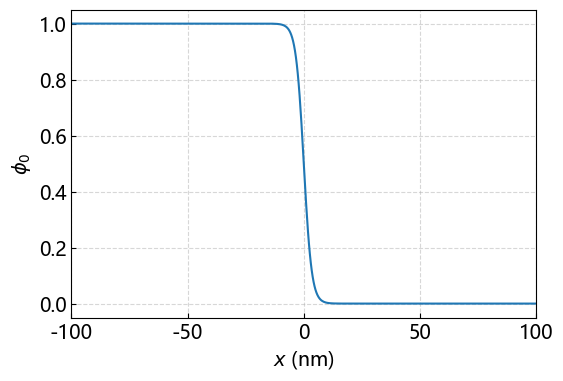

In [33]:
xs = np.linspace(-1e-4, 1e-4, 500)
phi0, c0 = ic(xs)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(xs, phi0, label=r'$\phi_0$')
# ax.plot(xs, c0, label=r'$c_0$')
ax.set(xlim=[-1e-4, 1e-4], xlabel=r'$x$ (nm)', ylabel=r'$\phi_0$')
# ax.xaxis.set_major_locator(plt.MultipleLocator(0.1e-4))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e6:.0f}'))

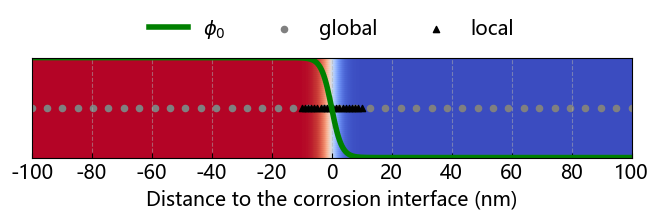

In [59]:
fields = np.hstack([
    xs.reshape(-1, 1),
    np.zeros_like(xs).reshape(-1, 1),
    phi0.reshape(-1, 1),
])
fields = np.vstack([fields]*50)
for i in range(50):
    fields[i*len(xs):(i+1)*len(xs), 1] = i / 50
    
x_global = np.linspace(-1e-4, 1e-4, 40)
x_local = np.linspace(-1e-5, 1e-5, 20)


    
fig = plt.figure(figsize=(6, 1))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(fields[:, 0], fields[:, 1], c=fields[:, 2], s=1, cmap='coolwarm')
ax.set(xlim=[-1e-4, 1e-4], ylim=[0, 1], xlabel="Distance to the corrosion interface (nm)")
ax.yaxis.set_ticks([])
ax.xaxis.set_major_locator(plt.MultipleLocator(0.2e-4))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e6:.0f}'))

ax.plot(xs, phi0, label=r'$\phi_0$', color="green", linewidth=4)
ax.scatter(x_global, np.ones_like(x_global) * 0.5, s=20, c='grey', marker='o', label="global")
ax.scatter(x_local, np.ones_like(x_local) * 0.5, s=20, c='black', marker='^', label="local")

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3, frameon=False)
# ax_colorbar = fig.add_axes([1.1, 0., 0.2, 0.8])
# ax_colorbar.set_title(r'$\phi_0$')
# fig.colorbar(ax.collections[0], cax=ax_colorbar)

In [198]:
xs = np.linspace(-100e-6, 100e-6, 300)
ys = np.linspace(0, 100e-6, 200)
xxs, yys = np.meshgrid(xs, ys)
def ic_2d(x, y):
    r = np.sqrt(x**2 + y**2)
    return 1 - ic(r-5e-6)[0], 1 - ic(r-5e-6)[1]

ph0, c0 = ic_2d(xxs, yys)

In [199]:
x_sampling = np.linspace(-100e-6, 100e-6, 50)[1:-1]
y_sampling = np.linspace(0, 100e-6, 30)[1:-1]
x_sampling_local = np.linspace(-10e-6, 10e-6, 20)
y_sampling_local = np.linspace(0, 10e-6, 10)

in_circle = lambda x, y : x**2 + y**2 < 10e-6**2

xxs_sampling, yys_sampling = np.meshgrid(x_sampling, y_sampling)
xxs_sampling_local, yys_sampling_local = np.meshgrid(x_sampling_local, y_sampling_local)
in_circle_idx = in_circle(xxs_sampling_local, yys_sampling_local)
xxs_sampling_local = xxs_sampling_local[in_circle_idx]
yys_sampling_local = yys_sampling_local[in_circle_idx]


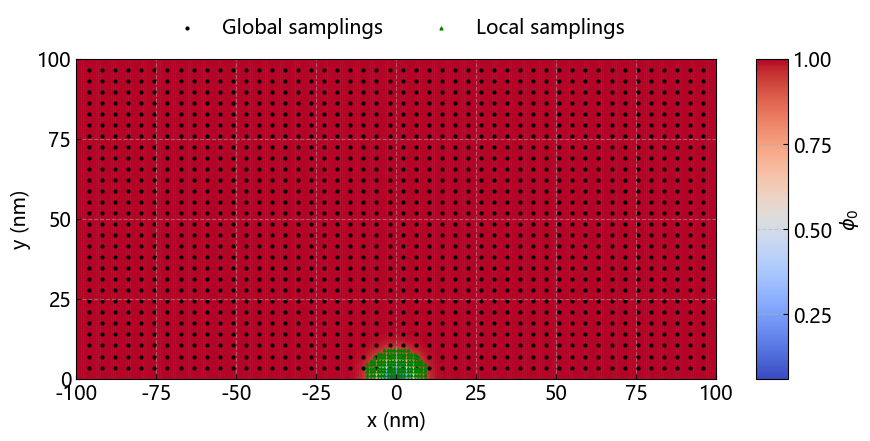

In [202]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0, 0, 0.8, 0.8])
ax.scatter(xxs, yys, c=ph0, s=1, cmap='coolwarm')
ax.set(xlim=[-100e-6, 100e-6], ylim=[0, 100e-6], xlabel='x (nm)', ylabel='y (nm)')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e6:.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e6:.0f}'))
ax.yaxis.set_major_locator(plt.MultipleLocator(25e-6))
ax.xaxis.set_major_locator(plt.MultipleLocator(25e-6))
ax.set_aspect('equal')

ax.scatter(xxs_sampling, yys_sampling, c='k', 
        marker='o', label="Global samplings", s=4)
ax.scatter(xxs_sampling_local, yys_sampling_local, c='green', 
        marker='^', label="Local samplings", s=4)

ax.legend(loc="lower center", bbox_to_anchor=(0.5, 1.01), ncol=2, frameon=False)

ax_colorbar = fig.add_axes([0.85, 0, 0.04, 0.8])
fig.colorbar(ax.collections[0], cax=ax_colorbar, 
             label=r'$\phi_0$', ticks=[0, 0.25, 0.5, 0.75, 1.0])